Data Visualisation & Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import calendar

In [4]:
# Load your dataset
df = pd.read_csv("integrated_data.csv", parse_dates=['DateTime'])

In [5]:
# Feature Engineering
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day_name()
df['Date'] = df['DateTime'].dt.date
df['Month'] = df['DateTime'].dt.month_name()
df['Weekday'] = df['DateTime'].dt.weekday  # Monday=0, Sunday=6
df['Week'] = df['DateTime'].dt.isocalendar().week

In [6]:
# Aggregation - Average vehicle count per hour for each junction
hourly_avg = df.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index(name='Avg_Vehicles')
print("Average vehicle count per hour for each junction:")
print(hourly_avg)

Average vehicle count per hour for each junction:
    Junction  Hour  Avg_Vehicles
0          1     0     32.601806
1          1     1     28.289819
2          1     2     24.495895
3          1     3     21.300493
4          1     4     18.898194
..       ...   ...           ...
91         4    19      8.850829
92         4    20      9.038674
93         4    21      8.425414
94         4    22      8.762431
95         4    23      8.309392

[96 rows x 3 columns]


In [7]:
# Use moving average
hourly_avg['Smoothed'] = hourly_avg.groupby('Junction')['Avg_Vehicles'].transform(lambda x: x.rolling(window=3, center=True, min_periods=1).mean())

In [33]:
# Peak Hour Identification
peak_hours = hourly_avg.loc[hourly_avg.groupby('Junction')['Avg_Vehicles'].idxmax()].sort_values(by='Avg_Vehicles', ascending=False)
print("Peak Hours Traffic Identification by Junction:")
print(peak_hours)

Peak Hours Traffic Identification by Junction:
    Junction  Hour  Avg_Vehicles   Smoothed
19         1    19     42.703612  41.369184
44         2    20     14.048440  13.769568
68         3    20     13.211823  12.795840
84         4    12     10.237569   9.327808


In [9]:
# Temporal Pattern Analysis - Weekdays vs Weekends
weekday_df = df.copy()
weekday_df['Is_Weekend'] = weekday_df['Weekday'] >= 5

weekly_pattern = weekday_df.groupby(['Junction', 'Hour', 'Is_Weekend'])['Vehicles'].mean().reset_index()
print(" Temporal Pattern Analysis - Weekdays vs Weekends:")
print(weekly_pattern)

 Temporal Pattern Analysis - Weekdays vs Weekends:
     Junction  Hour  Is_Weekend   Vehicles
0           1     0       False  33.881594
1           1     0        True  29.610959
2           1     1       False  29.368113
3           1     1        True  25.769863
4           1     2       False  25.633060
..        ...   ...         ...        ...
187         4    21        True   8.156863
188         4    22       False   8.915385
189         4    22        True   8.372549
190         4    23       False   8.530769
191         4    23        True   7.745098

[192 rows x 4 columns]


In [10]:
# Monthly Variation
monthly_pattern = df.groupby(['Junction', 'Month', 'Hour'])['Vehicles'].mean().reset_index()
print(" Monthly Variations:")
print(monthly_pattern)

 Monthly Variations:
      Junction      Month  Hour   Vehicles
0            1      April     0  39.539474
1            1      April     1  34.513158
2            1      April     2  29.210526
3            1      April     3  25.276316
4            1      April     4  21.907895
...        ...        ...   ...        ...
1147         4  September    19   8.500000
1148         4  September    20   7.333333
1149         4  September    21   8.000000
1150         4  September    22   8.166667
1151         4  September    23   7.833333

[1152 rows x 4 columns]


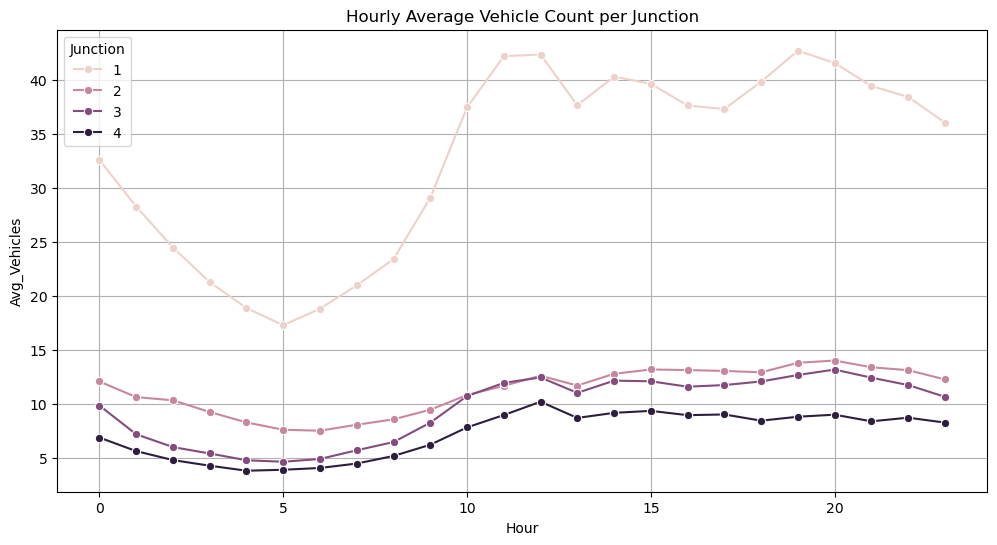

In [11]:
# --- Visualizations ---

# Line Plot: Hourly Avg Vehicles per Junction
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='Hour', y='Avg_Vehicles', hue='Junction', marker='o')
plt.title('Hourly Average Vehicle Count per Junction')
plt.grid(True)
plt.show()

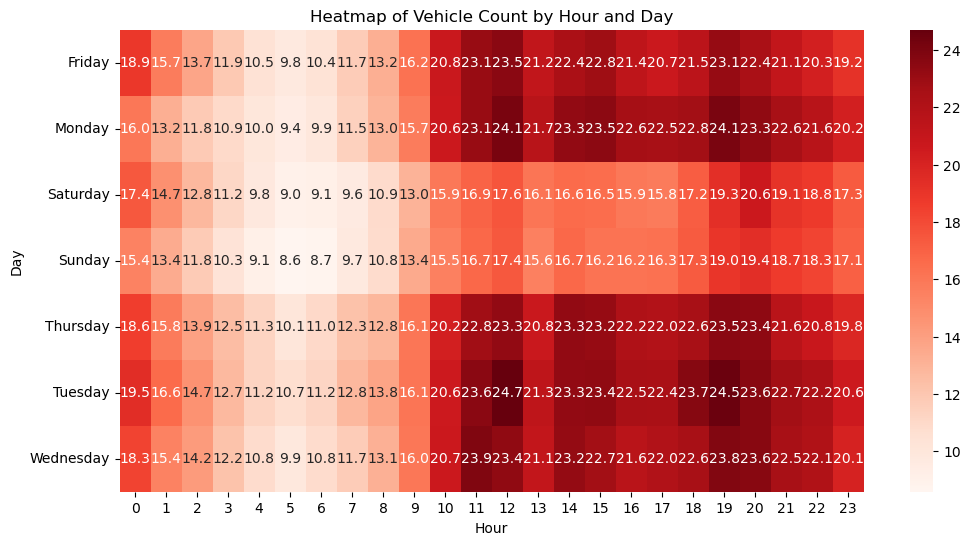

In [12]:
# Heatmap: Hour vs Day
pivot = df.groupby(['Day', 'Hour'])['Vehicles'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".1f")
plt.title('Heatmap of Vehicle Count by Hour and Day')
plt.show()

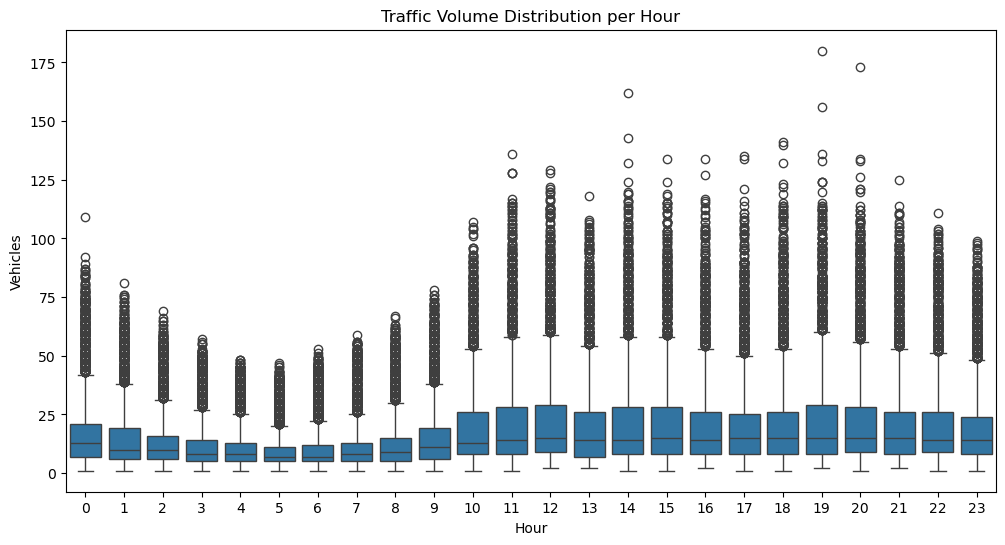

In [13]:
# Boxplot: Distribution per Hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Hour', y='Vehicles')
plt.title('Traffic Volume Distribution per Hour')
plt.show()

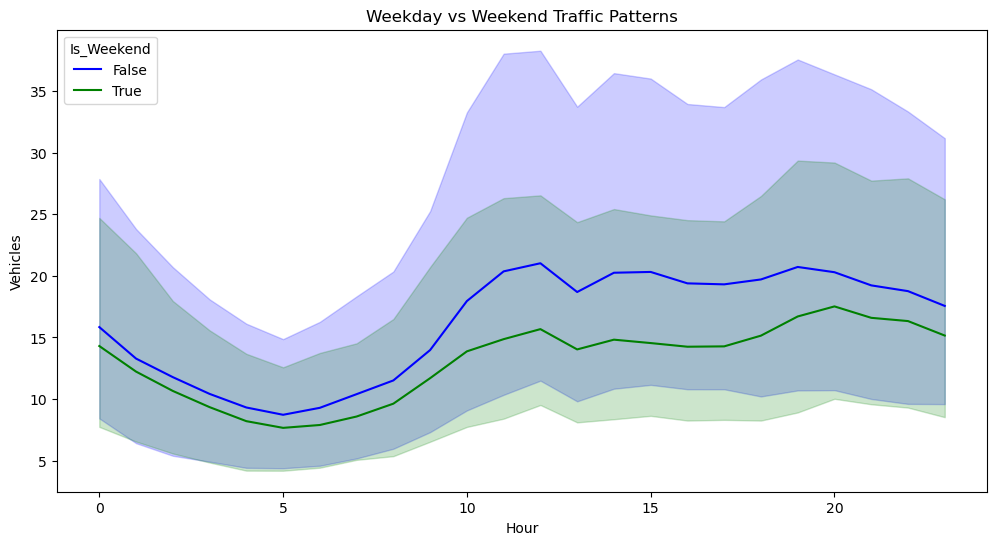

In [14]:
# Weekday vs Weekend Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_pattern, x='Hour', y='Vehicles', hue='Is_Weekend', palette=['blue', 'green'])
plt.title('Weekday vs Weekend Traffic Patterns')
plt.show()

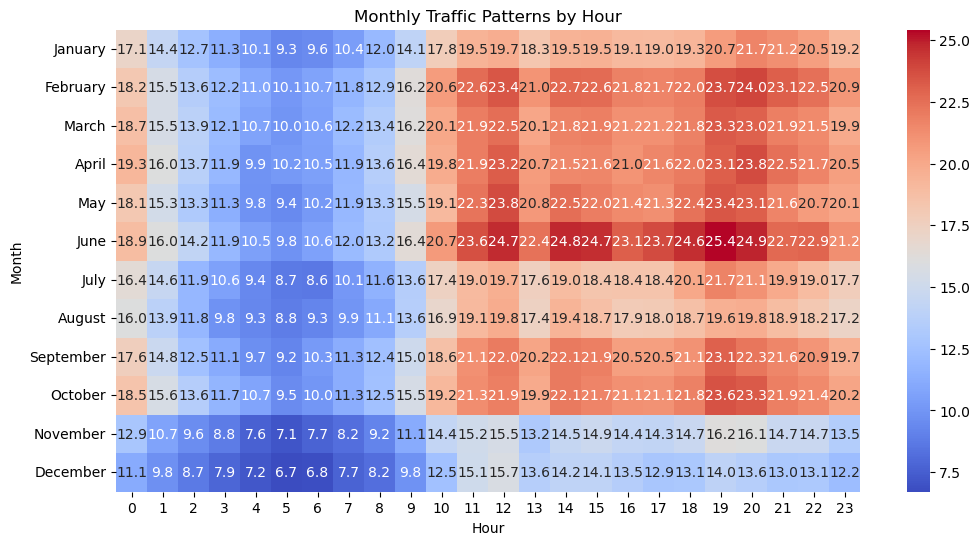

In [15]:
# Monthly Patterns Heatmap
monthly_pivot = monthly_pattern.pivot_table(index='Month', columns='Hour', values='Vehicles')
month_order = list(calendar.month_name)[1:]
monthly_pivot = monthly_pivot.reindex(month_order)
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Monthly Traffic Patterns by Hour')
plt.show()

In [16]:
# --- Reporting Output ---
print("Peak Traffic Hours by Junction:")
print(peak_hours)

Peak Traffic Hours by Junction:
    Junction  Hour  Avg_Vehicles   Smoothed
19         1    19     42.703612  41.369184
44         2    20     14.048440  13.769568
68         3    20     13.211823  12.795840
84         4    12     10.237569   9.327808
